In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def pic_for_windowsize(model_info,best_info):
    sg_params=best_info[best_info['style']=='skipgram'][['style', 'vec_size', 'epochs']].values[0]
    cbow_params=best_info[best_info['style']=='cbow'][['style', 'vec_size', 'epochs']].values[0]
    sg_models_info=model_info[(model_info['style']==sg_params[0])&(model_info['vec_size']==sg_params[1])&(model_info['epochs']==sg_params[2])].sort_values(by=['windows'],ascending=True)
    cbow_models_info=model_info[(model_info['style']==cbow_params[0])&(model_info['vec_size']==cbow_params[1])&(model_info['epochs']==cbow_params[2])].sort_values(by=['windows'],ascending=True)
    plt.figure(figsize=(8,6))
    similarity_metrics=['wordsim_r','wordsim_rho','simlex_r','simlex_rho']
    colors=['r','b','g','y']
    for metric,color in zip(similarity_metrics,colors):
        plt.plot(sg_models_info['windows'],sg_models_info[metric],color=color,label=metric)
    plt.xlabel('window size')
    plt.ylabel('correlation coefficient')
    plt.title('window_similarity')
    plt.grid(True,linestyle='--',alpha=0.3)
    plt.legend()
    plt.savefig('window_similarity.png',dpi=300,bbox_inches='tight')
    print(f'图片保存为window_similarity.png')
    plt.show()
    plt.close()
    plt.figure(figsize=(8,6))
    similarity_metrics=['analogy_sem','analogy_mor','analogy_all']
    colors=['r','b','g']
    for metric,color in zip(similarity_metrics,colors):
        plt.plot(cbow_models_info['windows'],cbow_models_info[metric],color=color,label=metric)
    plt.xlabel('window size')
    plt.ylabel('accuracy')
    plt.title('window_analogy')
    plt.grid(True,linestyle='--',alpha=0.3)
    plt.legend()
    plt.savefig('window_analogy.png',dpi=300,bbox_inches='tight')
    print(f'图片保存为window_analogy.png')
    plt.show()
    plt.close()

In [3]:
def final_report(best_info,pretrainedmodel_info):
    best_model_names=best_info['path'].apply(lambda x: x.replace('models/','').replace('.model',''))
    best_info['model_name']=best_model_names
    best_info=best_info[['model_name', 'wordsim_r', 'wordsim_p_r', 'wordsim_rho', 'wordsim_prho','wordsim_coverage','simlex_r','simlex_p_r','simlex_rho','simlex_prho','simlex_coverage','analogy_sem','analogy_sem_coverage','analogy_mor', 'analogy_mor_coverage', 'analogy_all','analogy_all_coverage']]
    final_report_df=pd.concat([pretrainedmodel_info,best_info],axis=0)
    final_report_df=final_report_df.round(2)
    final_report_df_sim=final_report_df[['model_name','wordsim_r','wordsim_rho','wordsim_coverage','simlex_r','simlex_rho','simlex_coverage',]]
    final_report_df_ana=final_report_df[['model_name','analogy_sem','analogy_sem_coverage','analogy_mor','analogy_mor_coverage','analogy_all','analogy_all_coverage']]
    final_report_df_sim.columns=[['','wordsim-353','wordsim-353','wordsim-353','simlex-999','simlex-999','simlex-999'],['model_name','pearson-r','spearman-rho','coverage','pearson-r','spearman-rho','coverage']]
    final_report_df_ana.columns=[['','semantics','semantics','morphology','morphology','all','all'],['model_name','accuracy','coverage','accuracy','coverage','accuracy','coverage']]
    final_report_df_sim.to_csv('similarity报告.csv',encoding='utf-8',index=False)
    final_report_df_ana.to_csv('analogy报告.csv',encoding='utf-8',index=False)
    print('报告已保存为similarity报告.csv，analogy报告.csv')

In [4]:
model_info=pd.read_csv('allmodel_info.csv',encoding='utf-8')
best_info=pd.read_csv('bestmodels_info.csv',encoding='utf-8')

图片保存为window_similarity.png


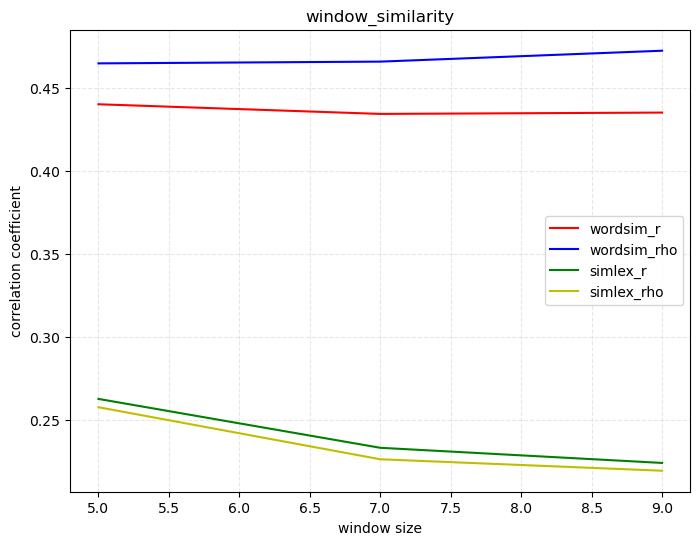

图片保存为window_analogy.png


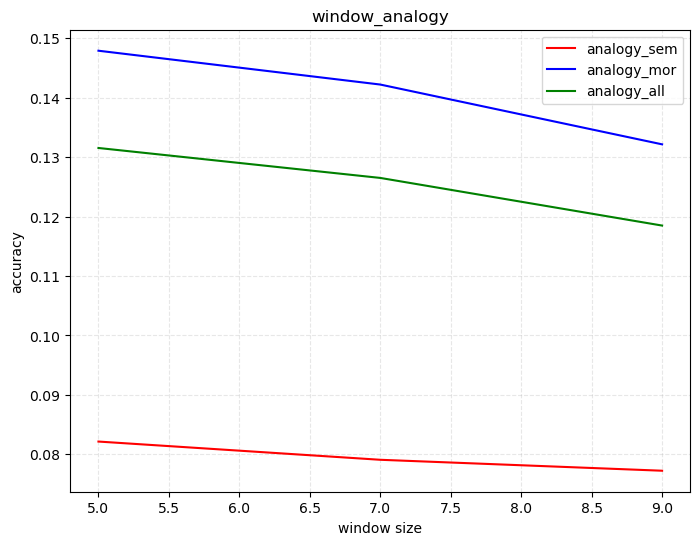

In [5]:
pic_for_windowsize(model_info=model_info,best_info=best_info)

In [6]:
pretrainedmodel_info=pd.read_csv('pretrainedmodel_info.csv',encoding='utf-8')
final_report(best_info,pretrainedmodel_info)

报告已保存为similarity报告.csv，analogy报告.csv
